Something weird happenning to 62330_2019_01_11_R_masked_cropped_flipped_cropTMJ.nii.gz in cropTMJ2

It seem like the first cut (in dim1) is in the wrong direction
It somehow get flipped????

In [1]:
import nibabel as nib
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy.signal import find_peaks

In [2]:
def local_minima(data):
    # Inverting the data to find local minima as local maxima
    inverted_data = -np.array(data)
    
    # Finding local maxima in the inverted data
    peaks, _ = find_peaks(inverted_data)
    
    if len(peaks) > 1:
        filtered_peak = [value for value in peaks if value > 100]
        peaks = [min(filtered_peak)]
    if len(peaks) == 0:
        peaks = [150]

    peak_pos = peaks[0]
    #peak_value = data[peak_pos]
    return peak_pos#, peak_value

    # Plotting the data
    # plt.figure(figsize=(10, 5))
    # plt.plot(data, label='Data')
    
    # # Highlighting local minima
    # plt.scatter(peaks, np.array(data)[peaks], color='red', label='Local Minima', zorder=5)
    
    # # Adding labels and legend
    # plt.title('Local Minima in the Data')
    # plt.xlabel('Index')
    # plt.ylabel('Value')
    # plt.legend()
    # plt.grid(True)
    # plt.show()
    # return peaks

In [3]:
def first_non_background_column(arr, background=-3990):

    for col_index in range(arr.shape[1]):
        if np.any(arr[:, col_index] > background):
            return col_index
        
    return -1

In [4]:
def cropping_TMJ(input_path, output_folder):
    vol_img = nib.load(input_path)
    vol = vol_img.get_fdata()

    top = []

    for slice_number in range(vol.shape[1]):
        slice_data = vol[:, slice_number, :]
        top_pixel = first_non_background_column(slice_data, background=-3900)
        top.append(top_pixel)

    flip_top = max(top) - np.array(top)
    peak_pos = local_minima(flip_top)

    cutting_axis_1 = peak_pos
    cutting_axis_2 = first_non_background_column(vol[:,peak_pos,:], background=-3900) + 50

    result_vol = vol[:,0:cutting_axis_1, 0:cutting_axis_2]
    result_img = nib.Nifti1Image(result_vol, vol_img.affine, vol_img.header)

    output_name = os.path.basename(input_path)
    output_name = os.path.splitext(output_name)[0]
    output_name = os.path.splitext(output_name)[0]
    output_name = f"{output_name}_cropTMJ.nii.gz"
    output_path = os.path.join(output_folder,output_name)

    nib.save(result_img, output_path)

input_path = r"C:\Users\acer\Desktop\Data_Prep_3\images\648619_2021_10_25_R_masked_cropped_flipped.nii.gz"
output_folder = r"C:\Users\acer\Desktop\Test_output"
cropping_TMJ(input_path, output_folder)

In [5]:
input_folder = r"C:\Users\acer\Desktop\Data_Prep_3\images"
output_folder = r"C:\Users\acer\Desktop\Data_Prep_3\CropTMJ2"

files = os.listdir(input_folder)
number_of_files = len(files)

progress_count = 0
for filename in files:

    progress_count += 1
    print(f"[Processing {progress_count} out of {number_of_files}]")

    input_path = os.path.join(input_folder, filename)
    #print(f"input_path : {input_path}")
    cropping_TMJ(input_path, output_folder)

[Processing 1 out of 375]
[Processing 2 out of 375]
[Processing 3 out of 375]
[Processing 4 out of 375]
[Processing 5 out of 375]
[Processing 6 out of 375]
[Processing 7 out of 375]
[Processing 8 out of 375]
[Processing 9 out of 375]
[Processing 10 out of 375]
[Processing 11 out of 375]
[Processing 12 out of 375]
[Processing 13 out of 375]
[Processing 14 out of 375]
[Processing 15 out of 375]
[Processing 16 out of 375]
[Processing 17 out of 375]
[Processing 18 out of 375]
[Processing 19 out of 375]
[Processing 20 out of 375]
[Processing 21 out of 375]
[Processing 22 out of 375]
[Processing 23 out of 375]
[Processing 24 out of 375]
[Processing 25 out of 375]
[Processing 26 out of 375]
[Processing 27 out of 375]
[Processing 28 out of 375]
[Processing 29 out of 375]
[Processing 30 out of 375]
[Processing 31 out of 375]
[Processing 32 out of 375]
[Processing 33 out of 375]
[Processing 34 out of 375]
[Processing 35 out of 375]
[Processing 36 out of 375]
[Processing 37 out of 375]
[Processin

In [11]:
input_path = r"C:\Users\acer\Desktop\Data_Prep_3\CropTMJ2\62330_2019_01_11_R_masked_cropped_flipped_cropTMJ.nii.gz"
vol_img = nib.load(input_path)
weird_vol = vol_img.get_fdata()

In [12]:
input_path = r"C:\Users\acer\Desktop\Data_Prep_3\images\62330_2019_01_11_R_masked_cropped_flipped.nii.gz"
vol_img = nib.load(input_path)
original_vol = vol_img.get_fdata()

In [15]:
input_path = r"C:\Users\acer\Desktop\Data_Prep_3\images\5450_2016_02_26_L_masked_cropped.nii.gz"
vol_img = nib.load(input_path)
normal_vol = vol_img.get_fdata()

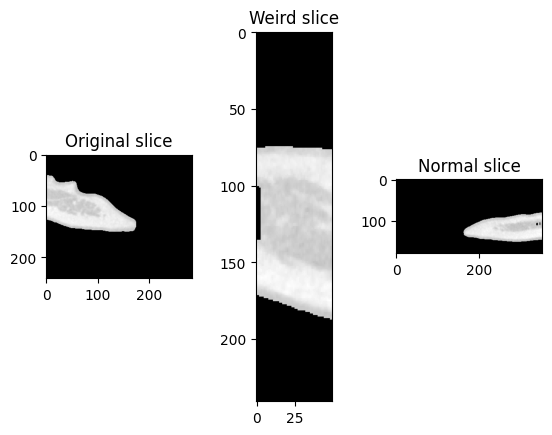

In [17]:
weird_slice = weird_vol[:,weird_vol.shape[1]//2,:]
origin_slice = original_vol[:,original_vol.shape[1]//2,:]
normal_slice = normal_vol[:,normal_vol.shape[1]//2,:]

f, axarr = plt.subplots(1,3)
axarr[0].set_title("Original slice")
axarr[0].imshow(origin_slice, cmap = 'grey')
axarr[1].set_title("Weird slice")
axarr[1].imshow(weird_slice, cmap = 'grey')
axarr[2].set_title("Normal slice")
axarr[2].imshow(normal_slice, cmap = 'grey')